In [8]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
file_name = 'summary_details.csv'
with open(file_name, 'rb') as f:
    summary_details_dict = pickle.load(f)

In [9]:
symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)

In [17]:
symbols_list.remove('scbtc')

In [ ]:
# only plot hari qlike

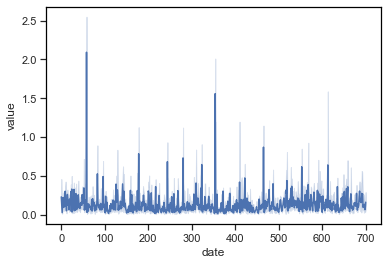

In [85]:
model = 'HAR+I'
summary = 'QLIKE'

qlikes_roll_list = list()

for symbol in symbols_list:
    qlike_roll = summary_details_dict[symbol][model, "Rolling", summary]
    qlikes_roll_list.append(qlike_roll)

qlikes_roll_list = np.array(qlikes_roll_list)

df = pd.DataFrame(qlikes_roll_list).transpose()

date_index = pd.date_range(start='2020-05-30', end='2022-04-30')

sns.set(font_scale=1)

molten = df.melt(var_name='asset', value_name='QLIKE')


df['date'] = df.index

ls = [i for i in range(0,23)]

molten = pd.melt(df, id_vars=['date'], value_vars=ls)

plt = sns.lineplot(data=molten, x='date', y='value')

plt.set_facecolor('white')
plt.tick_params(bottom=True, left=True)
for i, spine in plt.spines.items():
    spine.set_visible(True)
    spine.set_color('black')

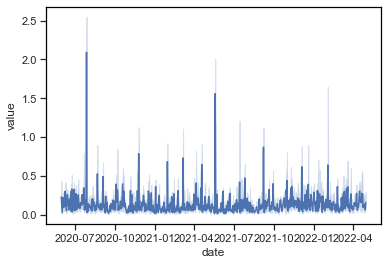

In [75]:
plt.figure

In [76]:
figure_path = 'results/hari_qlike_tseries.png'
# figures_path_base = 'figures/exploration/raw'
# figure_path = os.path.join(figures_path_base, figure_name)
plt.figure.savefig(figure_path, bbox_inches='tight', dpi=300)

In [83]:
len(summary_details_dict[symbol][model, "Calendar", summary])

701

In [86]:
len(summary_details_dict[symbol][model, "Calendar", summary] - summary_details_dict[symbol][model, "Rolling", summary])

701

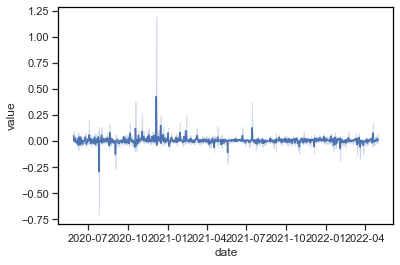

In [89]:
model = 'HAR+I'
summary = 'QLIKE'

qlikes_roll_list = list()

for symbol in symbols_list:
    qlike_roll = summary_details_dict[symbol][model, "Calendar", summary] - summary_details_dict[symbol][model, "Rolling", summary]
    qlikes_roll_list.append(qlike_roll)

qlikes_roll_list = np.array(qlikes_roll_list)

df = pd.DataFrame(qlikes_roll_list).transpose()

date_index = pd.date_range(start='2020-05-30', end='2022-04-30')
df.set_index(date_index, inplace=True)

sns.set(font_scale=1)

molten = df.melt(var_name='asset', value_name='QLIKE')


df['date'] = df.index

ls = [i for i in range(0,23)]

molten = pd.melt(df, id_vars=['date'], value_vars=ls)

plt = sns.lineplot(data=molten, x='date', y='value')

plt.set_facecolor('white')
plt.tick_params(bottom=True, left=True)
for i, spine in plt.spines.items():
    spine.set_visible(True)
    spine.set_color('black')

In [90]:
figure_path = 'results/hari_qlike_tseries_diff.png'
# figures_path_base = 'figures/exploration/raw'
# figure_path = os.path.join(figures_path_base, figure_name)
plt.figure.savefig(figure_path, bbox_inches='tight', dpi=300)